# バックテスト検証ノート

In [1]:
import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [2]:
current_dir = %pwd
timestamp = os.path.basename(current_dir)

In [3]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../../'

/home/tsu-nera/repo/bakuchi


In [4]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [5]:
bt = Backtesting(timestamp)

In [6]:
df_ex1 = bt.get_coincheck_df()
df_ex2 = bt.get_liquid_df()

In [7]:
len(df_ex1), len(df_ex2)

(74587, 74587)

## テスト実行

In [8]:
bt.run(amount=0.009, profit_margin_threshold=2000, profit_margin_diff=800)

##  取引履歴

In [9]:
arbitrage_histories = bt.get_arbitrage_histories()

headers = ["取引日時", "購入取引所", "売却取引所", "通貨ペア", "取引量", "期待利益"]
arbitrage_histories_df = pd.DataFrame(arbitrage_histories, columns=headers)
arbitrage_histories_df

,取引日時,購入取引所,売却取引所,通貨ペア,取引量,期待利益
0,2020-03-30 00:39:55,liquid,coincheck,BTC/JPY,0.009,10
1,2020-03-30 01:20:59,coincheck,liquid,BTC/JPY,0.009,0
2,2020-03-30 01:21:26,liquid,coincheck,BTC/JPY,0.009,10
3,2020-03-30 01:22:14,coincheck,liquid,BTC/JPY,0.009,-1
4,2020-03-30 01:22:33,liquid,coincheck,BTC/JPY,0.009,9
...,...,...,...,...,...,...
189,2020-03-30 21:37:14,coincheck,liquid,BTC/JPY,0.009,-1
190,2020-03-30 21:51:10,liquid,coincheck,BTC/JPY,0.009,10
191,2020-03-30 21:51:22,coincheck,liquid,BTC/JPY,0.009,0
192,2020-03-30 22:31:50,coincheck,liquid,BTC/JPY,0.009,9


In [10]:
histories = bt.get_trade_histories()
headers = ["取引日時",  "売買",  "取引所", "レート"]
histories_df = pd.DataFrame(histories, columns=headers)
histories_df

,取引日時,売買,取引所,レート
0,2020-03-30 00:39:55,買い,liquid,664595.0
1,2020-03-30 00:39:55,売り,coincheck,665801.0
2,2020-03-30 01:20:59,買い,coincheck,667663.0
3,2020-03-30 01:20:59,売り,liquid,667754.0
4,2020-03-30 01:21:26,買い,liquid,667307.0
...,...,...,...,...
383,2020-03-30 21:51:22,売り,liquid,685379.0
384,2020-03-30 22:31:50,買い,coincheck,687521.0
385,2020-03-30 22:31:50,売り,liquid,688578.0
386,2020-03-30 22:33:14,買い,liquid,688885.0


## 結果まとめ

In [11]:
bt.display()

バックテスト情報
+---------------------+---------------------+
|          レコード数 |               74587 |
+---------------------+---------------------+
|            取引回数 |                 194 |
+---------------------+---------------------+
|            開始日時 | 2020-03-30 00:34:36 |
+---------------------+---------------------+
|            終了日時 | 2020-03-30 22:45:55 |
+---------------------+---------------------+
|         取引時間[H] |     0 days 22:11:19 |
+---------------------+---------------------+
|       取引単位[BTC] |               0.009 |
+---------------------+---------------------+
|   利確しきい値[JPY] |                1000 |
+---------------------+---------------------+
| 損切りマージン[JPY] |                 800 |
+---------------------+---------------------+

バックテスト結果
+-------------+---------+
| 開始[JPY]   |   10000 |
+-------------+---------+
| 終了[JPY]   |   10993 |
+-------------+---------+
| 利益[JPY]   |     993 |
+-------------+---------+
| 開始[BTC]   |   0.022 |
+-------------+---------+
| 終了[BTC]  

## グラフ出力

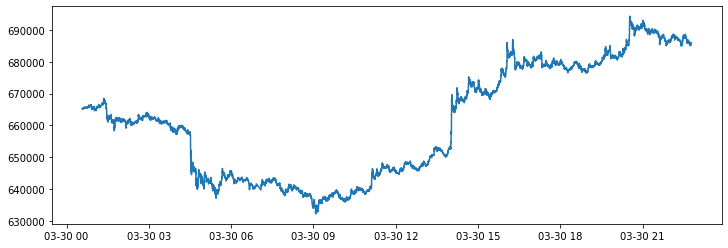

In [12]:
plt.figure(figsize=(12,4))
plt.plot(df_ex1.index, df_ex1['bid'])

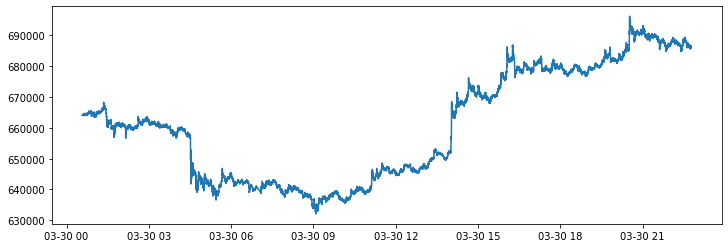

In [13]:
plt.figure(figsize=(12,4))
plt.plot(df_ex2.index, df_ex2['bid'])

## 分析

### 時間別の取引回数と利益

### 時間別の価格差の推移

In [14]:
profit_margin_df = pd.DataFrame({
    "timestamp": pd.to_datetime(df_ex1.index),
    "buy_coincheck_sell_liquid": df_ex2.reset_index().bid - df_ex1.reset_index().ask,
    "buy_liquid_sell_coincheck": df_ex1.reset_index().bid - df_ex2.reset_index().ask,
    'coincheck_bid': df_ex1.reset_index().bid,
     'liquid_ask': df_ex2.reset_index().ask,
    'liquid_bid': df_ex2.reset_index().bid,
    'coincheck_ask': df_ex1.reset_index().ask,
})

profit_margin_df = profit_margin_df.set_index("timestamp")

In [15]:
pd.options.display.float_format = '{:.0f}'.format
profit_margin_df.resample(rule='10Min').mean()

,buy_coincheck_sell_liquid,buy_liquid_sell_coincheck,coincheck_bid,liquid_ask,liquid_bid,coincheck_ask
timestamp,,,,,,
2020-03-30 00:30:00,-1358,979,665423,664444,664314,665672
2020-03-30 00:40:00,-1399,1069,665701,664632,664505,665904
2020-03-30 00:50:00,-1280,816,665738,664922,664758,666038
2020-03-30 01:00:00,-1339,834,665369,664535,664370,665709
2020-03-30 01:10:00,-1313,814,666309,665494,665368,666681
...,...,...,...,...,...,...
2020-03-30 22:00:00,68,-608,687609,688217,688036,687967
2020-03-30 22:10:00,-113,-380,687339,687720,687557,687671
2020-03-30 22:20:00,-95,-412,686427,686838,686664,686760
